# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, sem, t

In [2]:
df = pd.read_csv('data/body-temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

The sample appears fairly normally distributed with a mean close to the assumed population mean of 98.6 degrees.

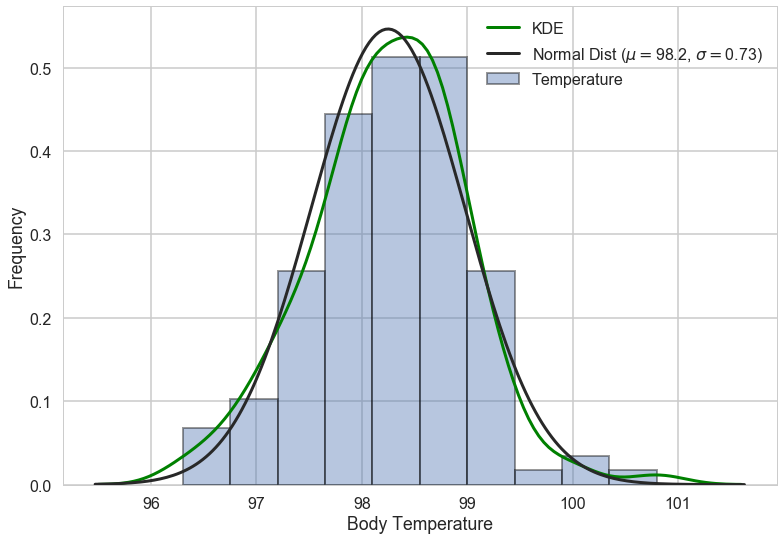

In [4]:
# Your work here.
mu, sigma = df.temperature.mean(), df.temperature.std()
ax = sns.distplot(df.temperature, fit=norm, kde=True, bins=10,
                  kde_kws={'label': 'KDE', 'color': 'green', 'linewidth': 3},
                  hist_kws={'label': 'Temperature', 'edgecolor': 'k', 'linewidth': 2},
                  fit_kws={'label': 'Normal Dist ($\mu=${0:.3g}, $\sigma=${1:.2f})'.format(mu, sigma),
                           'linewidth': 3})
ax.legend()
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

The dataset contains 130 samples, which is a reasonably large sample. This is large enough for us to assume the sample means are normally distributed.

In [5]:
print df.shape

(130, 3)


We will use a two-tailed test because we want to test the probability of getting a sample mean this extreme above or below the assumed population mean of 98.6 degrees. We can safely use a z-score because our sample size if sufficiently large.

In [6]:
# Calculate standard error
serr = sem(df.temperature)

# Verify standard error calculation
n = len(df)
print sigma / math.sqrt(n) - serr

0.0


The sample mean is more than 5 standard errors from the assumed population mean.

In [7]:
z = abs(mu - 98.6) / serr
print z

5.45482329236


There is a near zero chance of getting this sample mean if the true population mean is 98.6 degrees. We can safely conclude that the population mean is not 98.6 degrees.

In [8]:
print norm.sf(z) * 2 # multiply by 2 for a two-tailed test

4.9021570141e-08


Using a two-tailed t-test also produces a probability near zero.

In [9]:
print t.sf(z, n-1) * 2

2.41063204156e-07


We are 95% confident that the true temperature of the population is within 0.126 degrees of the 98.2 degrees observed in the sample.

In [10]:
zcrit = norm.ppf(0.975) # 97.5% for a two-tailed 95% confidence interval
d = serr * zcrit
print d

0.126034341049


This yields a 95% confidence interval of 98.12 degrees to 98.38 degrees. Someone's temperature should be considered "abnormal" if it falls outside of this range.

In [11]:
print (mu-d, mu+d)

(98.123196428181629, 98.375265110279869)


This can also be calculated with the interval method built into scipy.

In [12]:
print norm.interval(0.95, loc=mu, scale=serr)

(98.123196428181629, 98.375265110279869)


Women in the sample have a body temperature about 0.29 degrees warmer on average than men.

In [13]:
Tmale = df.temperature[df.gender=='M']
Tfemale = df.temperature[df.gender=='F']
Tdiff = Tfemale.mean() - Tmale.mean()
print Tdiff

0.289230769231


If we assume that there is no difference between men's and women's temperatures in the population, we can calculate what the probability is of seeing this difference by chance. First we calculate the standard deviation of the sampling distribution of the difference between male and female temperatures.

In [14]:
sigma = math.sqrt(Tmale.var()/len(Tmale) + Tfemale.var()/len(Tfemale))

Using the critical z-score from above, we are 95% confident that a sample of the difference between male and female temperatures will be less than 0.25 degrees assuming there is no difference in the population (zero mean). Since we observed a sample difference of 0.29 degrees, we are fairly confident that there is a statistically significant difference between men's and women's body temperatures.

In [15]:
d = sigma * zcrit
print d

0.248041184924


Another way of looking at this is to calculate the observed z-score of the temperature difference, which is 2.28.

In [16]:
z = Tdiff / sigma
print z

2.28543453817


There is only a probability of 2.2% of seeing these results by chance, so we reject the null hypothesis that there is no difference between male and female body temperatures.

In [17]:
print norm.sf(z) * 2 # multiply by 2 for a two-tailed test

0.0222873607607
